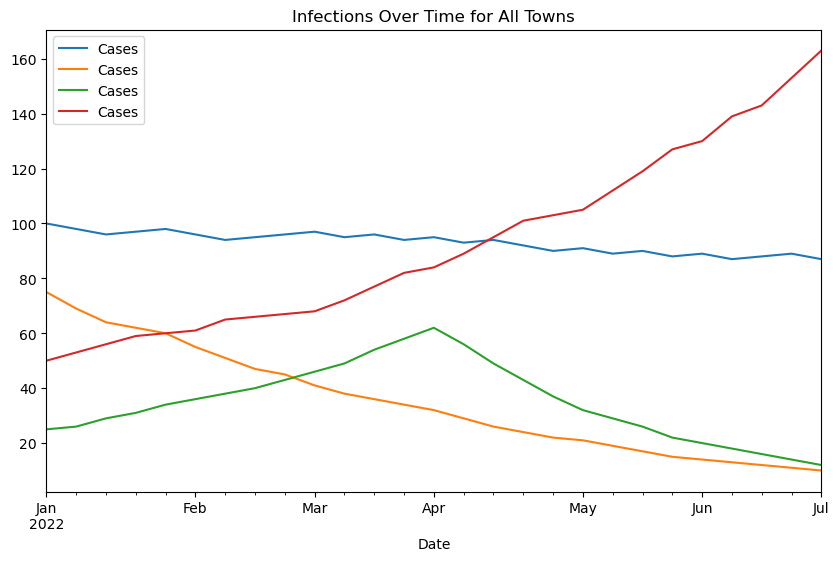

In [1]:
# a) Line graph for infections over time for all cities

import pandas as pd
import matplotlib.pyplot as plt

health_data = pd.read_csv('HealthData.csv')
population_data = pd.read_csv('PopulationData.csv')
population_data = population_data.set_index('Towncode')

health_data['Date'] = pd.to_datetime(health_data['Date'])

plt.figure(figsize=(10, 6))
health_data.groupby('Towncode').plot(x='Date', y='Cases', ax=plt.gca(), legend=True)
plt.title('Infections Over Time for All Towns')
plt.show()



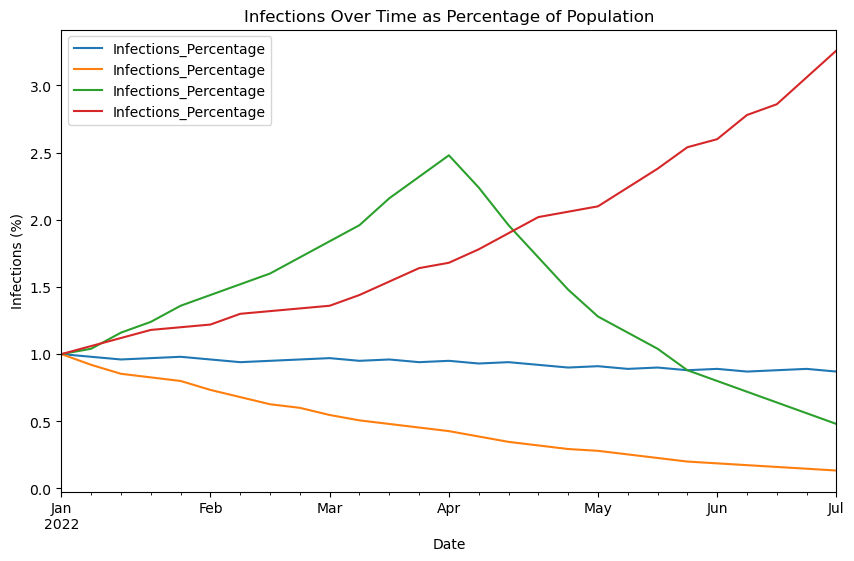

In [2]:
# b) Line chart for infections over time as a percentage of population for each city
health_data['Date'] = pd.to_datetime(health_data['Date'])
joined_data = health_data.join(population_data, on='Towncode')
joined_data['Infections_Percentage'] = (joined_data['Cases'] / joined_data['Population']) * 100

plt.figure(figsize=(10, 6))
joined_data.groupby('Towncode').plot(x='Date', y='Infections_Percentage', ax=plt.gca(), legend=True)
plt.title('Infections Over Time as Percentage of Population')
plt.xlabel('Date')
plt.ylabel('Infections (%)')
plt.show()


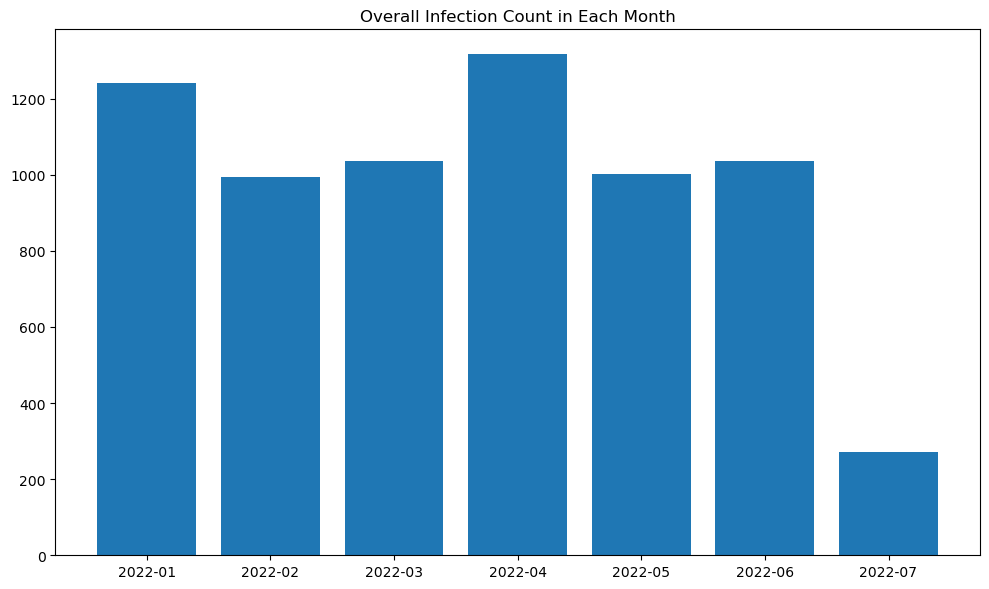

In [3]:

# c) Stacked bar chart for overall infection count in each month
health_data['Month'] = health_data['Date'].dt.to_period('M')
total_infections_per_month = health_data.groupby('Month')['Cases'].sum()

plt.figure(figsize=(10, 6))
plt.bar(total_infections_per_month.index.astype(str), total_infections_per_month)
plt.title('Overall Infection Count in Each Month')
plt.tight_layout()
plt.show()